# Очистка данных

In [136]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
from numpy import mean

### Файл oil-spill.csv это совокупность некоторых признаков (на основании спутниковых изображений океана) которые должны указывать содержит этот некоторый участок розлив нефти или нет
### Отсутствие розлива 0, розлив нефти 1 (последняя колонка)

In [64]:
filename = "D:\Projects\DS_Fst_course\Prepareted_data\oil-spill.csv"
data=read_csv(filename, header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000.0,41.53,6.24,3660.0,0.15,...,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500.0,51.67,0.83,1810.0,0.02,...,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000.0,38.90,5.89,3720.0,0.15,...,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000.0,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


### 1. Удаление признаков с низкой вариацией значений

In [65]:
counts = data.nunique()
print(counts)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [66]:
data.shape

(937, 50)

In [73]:
data.dropna(thresh=2, axis=1)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [75]:
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[22]


In [79]:
data.drop(to_del, axis=1, inplace=True)

In [81]:
data.shape

(937, 49)

In [82]:
df = data.values

In [88]:
data.drop(0, axis=1, inplace=True)

In [89]:
data

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,110.0,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,107.2,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,133.9,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,97.5,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


### Используем функцию VarianceThreshold() которая удаляет признаки с нулевой дисперсией

In [96]:
filename = "D:\Projects\DS_Fst_course\Prepareted_data\oil-spill.csv"
df=read_csv(filename, header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000.0,41.53,6.24,3660.0,0.15,...,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500.0,51.67,0.83,1810.0,0.02,...,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000.0,38.90,5.89,3720.0,0.15,...,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000.0,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


In [97]:
data = df.values

In [98]:
X = data[:, :-1]
y = data[:, -1]

In [100]:
X.shape

(937, 49)

In [103]:
transform = VarianceThreshold()

### Применим матрицу факторных признаков Х с помощью созданного объекта, применив метод fit_transform()

In [104]:
X_sel = transform.fit_transform(X)

In [106]:
X_sel.shape
# действительно удалился один столбец с отсутствием дисперсии

(937, 48)

## 2. Удаление дубликатов

### Работаем с датасетом iris

In [108]:
iris = "D:\Projects\DS_Fst_course\Prepareted_data\iris.csv"
df=read_csv(iris, header=None)
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Находим дубликаты в каждой строчке

In [109]:
dups = df.duplicated()

In [110]:
dups

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [111]:
# Проверяем в принципе наличие дубликатов используя метод any()
print(dups.any())

True


In [112]:
# Выводим сточки с дубликатами с помощью маски
print(df[dups])

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [113]:
df.shape

(150, 5)

In [114]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)

In [115]:
df.shape

(147, 5)

## 2. Выявление и удаление выбросов

In [119]:
# Задаем счетчик случайных чисел
seed(1)

In [123]:
# создаем 10000 нормально распределенных чисел со средним 50 и стандартным отклонением 5.
data = 5 * randn(10000) + 50

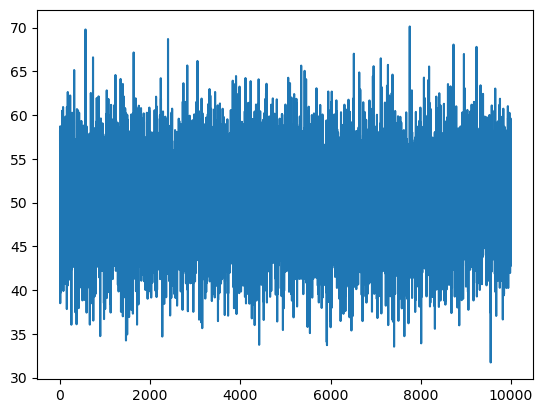

In [134]:
plt.plot(data)
plt.show()

In [143]:
# Вычисление среднего и стандартного отклонения
data_mean, data_std = np.mean(data), np.std(data)

In [144]:
# Найдем 3 стандартных отклонения,что будет составлять  99.7 процентов данных
cut_off = data_std * 3

In [145]:
# Найдем верхнюю и нижнюю границы интервалов 99.7 процентов данных
lower, upper = data_mean - cut_off, data_mean + cut_off

In [146]:
# В переменную outliers запишем данные которые выходят за границу
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


In [147]:
 # В переменную outliers_removed запишем данные которые внутри границы
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9971


### Если распределение данных существенно отличается от нормального, то выбросы корректней определять, как 1.5 межквартильных размаха от первого и третьего квартилей

In [151]:
### В переменные q25, q75 запишем значения первого и третьего квартилей, воспользовавшись функцией percentile() из модуля numpy.
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)

In [153]:
### Находим межквартильных размах
iqr = q75 - q25

In [154]:
### В переменную cut_off запишем величину, равную 1.5 межквартильных размаха.
cut_off = iqr * 1.5

In [155]:
### Найдем нижнюю (lower) и верхнюю (upper) границу интервала, охватывающего данные без выбросов.
lower, upper = q25 - cut_off, q75 + cut_off

In [156]:
### В переменную outliers запишем данные, которые выходят за указанные границы, т.е. являются выбросами.
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 81


In [158]:
### В переменную outliers_removed запишем данные, которые не выходят за указанные границы, т.е. не являются выбросами.
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9919


### Используем функцию LocalOutlierFactor(), которая использует принцип метода ближайших соседей для выявления выбросов как наиболее удаленных от основного набора данных наблюдений.